# Data cleaning and wrangling

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [170]:
import seaborn as sns

- Remove the outliers in the dataset using one of the methods we've discussed by defining a function and applying it to the dataframe.

- Create a copy of the dataframe for the data wrangling.

- Normalize the continuous variables.

- Encode the categorical variables

- Transform the time variables (day, week and month) to integers.

- Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

# The Data

In [171]:
ds = pd.read_csv('unit4.csv')


In [172]:
ds.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,...,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,...,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,...,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,...,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,...,,113,43,10,25,9702,L2F,37,14.0,6.864865


In [173]:
cols = []
for i in range(len(ds.columns)):
    cols.append(ds.columns[i].lower().replace(' ','_'))
ds.columns = cols
print(ds.columns)

Index(['state', 'pvastate', 'dob', 'mdmaud', 'recp3', 'gender', 'domain',
       'income', 'homeownr', 'hv1', 'hv2', 'hv3', 'hv4', 'ic1', 'ic2', 'ic3',
       'ic4', 'ic5', 'veterans', 'numprom', 'cardprom', 'cardpm12', 'numprm12',
       'maxadate', 'rfa_2', 'ngiftall', 'timelag', 'avggift'],
      dtype='object')


In [174]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     90569 non-null  object 
 1   pvastate  90569 non-null  object 
 2   dob       90569 non-null  int64  
 3   mdmaud    90569 non-null  object 
 4   recp3     90569 non-null  object 
 5   gender    90569 non-null  object 
 6   domain    90569 non-null  object 
 7   income    70386 non-null  float64
 8   homeownr  90569 non-null  object 
 9   hv1       90569 non-null  int64  
 10  hv2       90569 non-null  int64  
 11  hv3       90569 non-null  int64  
 12  hv4       90569 non-null  int64  
 13  ic1       90569 non-null  int64  
 14  ic2       90569 non-null  int64  
 15  ic3       90569 non-null  int64  
 16  ic4       90569 non-null  int64  
 17  ic5       90569 non-null  int64  
 18  veterans  90569 non-null  object 
 19  numprom   90569 non-null  int64  
 20  cardprom  90569 non-null  in

In [175]:
ds.describe()




,dob,income,hv1,hv2,hv3,hv4,ic1,ic2,ic3,ic4,ic5,numprom,cardprom,cardpm12,numprm12,maxadate,ngiftall,timelag,avggift
count,90569.000000,70386.000000,90569.000000,90569.00000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,80916.000000,90569.000000
mean,2724.442789,3.878257,1056.391304,1127.42116,4.213473,3.865462,339.373240,386.231083,386.694068,429.977917,15682.038600,46.797204,18.370701,5.343407,12.837351,9701.640606,9.501353,8.114378,13.428585
std,2136.453823,1.855265,936.383991,942.16266,2.302380,2.239738,162.390371,173.082626,160.945113,171.332133,8508.870754,22.944967,8.582096,1.207126,4.499933,5.679884,8.495065,8.310877,10.796349
min,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,9611.000000,1.000000,0.000000,1.285714
25%,112.000000,2.000000,511.000000,553.00000,3.000000,2.000000,230.000000,273.000000,277.000000,314.000000,10770.000000,27.000000,11.000000,5.000000,11.000000,9702.000000,3.000000,4.000000,8.454545
50%,2610.000000,4.000000,735.000000,800.00000,4.000000,3.000000,309.000000,355.000000,353.000000,396.000000,13692.000000,46.000000,18.000000,6.000000,12.000000,9702.000000,7.000000,6.000000,11.666667
75%,4601.000000,5.000000,1206.000000,1320.00000,5.000000,5.000000,414.000000,464.000000,465.000000,513.000000,18128.000000,64.000000,25.000000,6.000000,13.000000,9702.000000,13.000000,11.000000,15.625000
max,9710.000000,7.000000,6000.000000,6000.00000,13.000000,13.000000,1500.000000,1500.000000,1500.000000,1500.000000,159306.000000,195.000000,61.000000,19.000000,78.000000,9702.000000,237.000000,1088.000000,1000.000000


Which are the outliers? (the unusual values)

The interquartile range (IQR) is the difference between the 75th and 25th percentile of the data. ... The rng parameter allows this function to compute other percentile ranges than the actual IQR. For example, setting rng=(0, 100) is equivalent to numpy. ptp . The IQR of an empty array is np.

In [176]:
Q1 = ds.quantile(0.25)
Q3 = ds.quantile(0.75)
IQR = Q3 - Q1
IQR

dob         4489.000000
income         3.000000
hv1          695.000000
hv2          767.000000
hv3            2.000000
hv4            3.000000
ic1          184.000000
ic2          191.000000
ic3          188.000000
ic4          199.000000
ic5         7358.000000
numprom       37.000000
cardprom      14.000000
cardpm12       1.000000
numprm12       2.000000
maxadate       0.000000
ngiftall      10.000000
timelag        7.000000
avggift        7.170455
dtype: float64

In [177]:
df_outlier = (ds < (Q1 - 1.5 * IQR)) |(ds > (Q3 + 1.5 * IQR))

<ipython-input-177-d5bee5460546>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outlier = (ds < (Q1 - 1.5 * IQR)) |(ds > (Q3 + 1.5 * IQR))
<ipython-input-177-d5bee5460546>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outlier = (ds < (Q1 - 1.5 * IQR)) |(ds > (Q3 + 1.5 * IQR))


In [178]:
df_outlier

,avggift,cardpm12,cardprom,dob,domain,gender,homeownr,hv1,hv2,hv3,...,mdmaud,ngiftall,numprm12,numprom,pvastate,recp3,rfa_2,state,timelag,veterans
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
90565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
90566,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
90567,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [179]:
df_outlier.any(axis = 1)

0         True
1         True
2        False
3        False
4         True
         ...  
90564    False
90565    False
90566     True
90567     True
90568     True
Length: 90569, dtype: bool

'True' and 'False' values as output from the IQR score. 
'True' represents presence of an outlier.

In [180]:
ds[df_outlier.any(axis = 1)]

,state,pvastate,dob,mdmaud,recp3,gender,domain,income,homeownr,hv1,...,veterans,numprom,cardprom,cardpm12,numprm12,maxadate,rfa_2,ngiftall,timelag,avggift
0,IL,,3712,XXXX,,F,T2,NaN,,479,...,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,...,,32,12,6,13,9702,L2G,3,18.0,15.666667
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,...,,113,43,10,25,9702,L2F,37,14.0,6.864865
13,LA,,0,XXXX,,M,T2,NaN,,677,...,,72,23,7,29,9702,L1G,12,1.0,20.416667
15,CA,,0,XXXX,,M,U1,1.0,H,5251,...,,27,9,4,10,9702,L1F,2,23.0,12.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90559,FL,,1201,XXXX,,F,S2,4.0,H,977,...,,65,27,6,13,9702,L1F,8,28.0,12.125000
90563,CA,,0,XXXX,,F,C3,NaN,,1127,...,,40,17,6,13,9702,L1G,3,19.0,26.666667
90566,TX,,5001,XXXX,,M,C1,7.0,H,1679,...,,10,4,3,8,9702,L1F,1,NaN,20.000000
90567,MI,,3801,XXXX,X,M,C3,NaN,,376,...,,33,14,7,17,9702,L3E,7,3.0,8.285714


In [181]:
ds_outlier = ds[df_outlier.any(axis = 1)]

In [182]:
ds[~df_outlier.any(axis = 1)]

,state,pvastate,dob,mdmaud,recp3,gender,domain,income,homeownr,hv1,...,veterans,numprom,cardprom,cardpm12,numprm12,maxadate,rfa_2,ngiftall,timelag,avggift
2,NC,,0,XXXX,,M,R2,3.0,U,497,...,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,...,,66,27,6,14,9702,L4E,16,9.0,6.812500
5,AL,,0,XXXX,,,T2,NaN,,807,...,,35,15,6,12,9702,L1F,4,6.0,12.750000
6,IN,,6001,XXXX,,F,T2,4.0,H,484,...,,63,26,4,9,9702,L1E,14,4.0,7.642857
7,LA,,0,XXXX,,F,T2,2.0,U,702,...,,35,14,6,12,9702,L3E,5,6.0,6.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90560,LA,,2801,XXXX,,F,C1,6.0,H,922,...,,30,11,4,10,9702,L1F,3,10.0,9.666667
90561,AL,,0,XXXX,,F,R3,NaN,,457,...,,27,11,6,14,9702,L3E,4,2.0,9.750000
90562,KY,,4506,XXXX,,F,R2,1.0,H,341,...,,38,17,6,12,9702,L4E,10,3.0,5.900000
90564,FL,,4803,XXXX,,F,S2,6.0,H,733,...,,59,23,5,12,9702,L4D,24,3.0,3.375000


New dataset cleaned of Outliers

In [183]:
ds_non_outlier = ds[~df_outlier.any(axis = 1)]

In [184]:
ds_non_outlier.isna().sum()/len(ds)

state       0.000000
pvastate    0.000000
dob         0.000000
mdmaud      0.000000
recp3       0.000000
gender      0.000000
domain      0.000000
income      0.133975
homeownr    0.000000
hv1         0.000000
hv2         0.000000
hv3         0.000000
hv4         0.000000
ic1         0.000000
ic2         0.000000
ic3         0.000000
ic4         0.000000
ic5         0.000000
veterans    0.000000
numprom     0.000000
cardprom    0.000000
cardpm12    0.000000
numprm12    0.000000
maxadate    0.000000
rfa_2       0.000000
ngiftall    0.000000
timelag     0.059921
avggift     0.000000
dtype: float64

In [185]:
ds_non_outlier.dropna().isna().sum()

state       0
pvastate    0
dob         0
mdmaud      0
recp3       0
gender      0
domain      0
income      0
homeownr    0
hv1         0
hv2         0
hv3         0
hv4         0
ic1         0
ic2         0
ic3         0
ic4         0
ic5         0
veterans    0
numprom     0
cardprom    0
cardpm12    0
numprm12    0
maxadate    0
rfa_2       0
ngiftall    0
timelag     0
avggift     0
dtype: int64

In [186]:
ds_non_outlier.dropna()

,state,pvastate,dob,mdmaud,recp3,gender,domain,income,homeownr,hv1,...,veterans,numprom,cardprom,cardpm12,numprm12,maxadate,rfa_2,ngiftall,timelag,avggift
2,NC,,0,XXXX,,M,R2,3.0,U,497,...,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,...,,66,27,6,14,9702,L4E,16,9.0,6.812500
6,IN,,6001,XXXX,,F,T2,4.0,H,484,...,,63,26,4,9,9702,L1E,14,4.0,7.642857
7,LA,,0,XXXX,,F,T2,2.0,U,702,...,,35,14,6,12,9702,L3E,5,6.0,6.200000
8,IA,,0,XXXX,,M,R2,3.0,U,234,...,,70,29,6,12,9702,L1F,11,8.0,18.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90557,CO,P,0,XXXX,,F,T2,3.0,U,737,...,,75,31,6,15,9702,L2G,14,10.0,9.285714
90558,GA,,5410,XXXX,,F,T2,2.0,H,539,...,,72,33,6,16,9702,L3G,17,21.0,16.235294
90560,LA,,2801,XXXX,,F,C1,6.0,H,922,...,,30,11,4,10,9702,L1F,3,10.0,9.666667
90562,KY,,4506,XXXX,,F,R2,1.0,H,341,...,,38,17,6,12,9702,L4E,10,3.0,5.900000


Data Wrangling

In [187]:
ds_wr = ds_non_outlier.dropna()
ds_wr

,state,pvastate,dob,mdmaud,recp3,gender,domain,income,homeownr,hv1,...,veterans,numprom,cardprom,cardpm12,numprm12,maxadate,rfa_2,ngiftall,timelag,avggift
2,NC,,0,XXXX,,M,R2,3.0,U,497,...,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,...,,66,27,6,14,9702,L4E,16,9.0,6.812500
6,IN,,6001,XXXX,,F,T2,4.0,H,484,...,,63,26,4,9,9702,L1E,14,4.0,7.642857
7,LA,,0,XXXX,,F,T2,2.0,U,702,...,,35,14,6,12,9702,L3E,5,6.0,6.200000
8,IA,,0,XXXX,,M,R2,3.0,U,234,...,,70,29,6,12,9702,L1F,11,8.0,18.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90557,CO,P,0,XXXX,,F,T2,3.0,U,737,...,,75,31,6,15,9702,L2G,14,10.0,9.285714
90558,GA,,5410,XXXX,,F,T2,2.0,H,539,...,,72,33,6,16,9702,L3G,17,21.0,16.235294
90560,LA,,2801,XXXX,,F,C1,6.0,H,922,...,,30,11,4,10,9702,L1F,3,10.0,9.666667
90562,KY,,4506,XXXX,,F,R2,1.0,H,341,...,,38,17,6,12,9702,L4E,10,3.0,5.900000


In [188]:
df = pd.DataFrame(ds)

In [189]:
df_nums = ds_wr._get_numeric_data()
df_nums.head()

,dob,income,hv1,hv2,hv3,hv4,ic1,ic2,ic3,ic4,ic5,numprom,cardprom,cardpm12,numprm12,maxadate,ngiftall,timelag,avggift
2,0,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27,12.0,7.481481
3,2801,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16,9.0,6.812500
6,6001,4.0,484,519,3,3,251,284,278,311,10717,63,26,4,9,9702,14,4.0,7.642857
7,0,2.0,702,787,3,3,367,457,431,466,14248,35,14,6,12,9702,5,6.0,6.200000
8,0,3.0,234,288,2,1,226,266,280,323,11127,70,29,6,12,9702,11,8.0,18.090909


<AxesSubplot:>

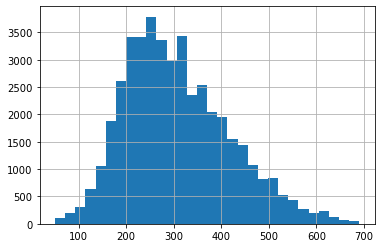

In [202]:
df_nums.ic1.hist(bins = 30)

Continous variables from the wrangeled data Normalized

In [203]:
from sklearn.preprocessing import Normalizer

In [204]:
transformer = Normalizer().fit(df_nums)
x = transformer.transform(df_nums)
df_norm = pd.DataFrame(x,columns = df_nums.columns)


In [205]:
df_norm

,dob,income,hv1,hv2,hv3,hv4,ic1,ic2,ic3,ic4,ic5,numprom,cardprom,cardpm12,numprm12,maxadate,ngiftall,timelag,avggift
0,0.000000,0.000198,0.032840,0.036078,0.000132,0.000066,0.016585,0.019295,0.019295,0.022466,0.764909,0.004163,0.001718,0.000396,0.000925,0.641081,0.001784,0.000793,0.000494
1,0.153235,0.000055,0.054707,0.069095,0.000109,0.000055,0.021117,0.021226,0.021664,0.023141,0.827719,0.003611,0.001477,0.000328,0.000766,0.530769,0.000875,0.000492,0.000373
2,0.382749,0.000255,0.030870,0.033102,0.000191,0.000191,0.016009,0.018114,0.017731,0.019836,0.683539,0.004018,0.001658,0.000255,0.000574,0.618802,0.000893,0.000255,0.000487
3,0.000000,0.000116,0.040598,0.045514,0.000173,0.000173,0.021224,0.026429,0.024926,0.026950,0.823990,0.002024,0.000810,0.000347,0.000694,0.561086,0.000289,0.000347,0.000359
4,0.000000,0.000203,0.015834,0.019489,0.000135,0.000068,0.015293,0.018000,0.018947,0.021857,0.752946,0.004737,0.001962,0.000406,0.000812,0.656519,0.000744,0.000541,0.001224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43751,0.000000,0.000185,0.045420,0.043139,0.000247,0.000247,0.016948,0.018981,0.018057,0.018735,0.798264,0.004622,0.001910,0.000370,0.000924,0.597912,0.000863,0.000616,0.000572
43752,0.295816,0.000109,0.029472,0.038276,0.000164,0.000164,0.015693,0.018591,0.019739,0.022309,0.791977,0.003937,0.001804,0.000328,0.000875,0.530500,0.000930,0.001148,0.000888
43753,0.104470,0.000224,0.034388,0.046398,0.000149,0.000149,0.012756,0.015292,0.015217,0.018089,0.924041,0.001119,0.000410,0.000149,0.000373,0.361859,0.000112,0.000373,0.000361
43754,0.343808,0.000076,0.026018,0.032122,0.000153,0.000076,0.012132,0.014116,0.016328,0.018007,0.575455,0.002899,0.001297,0.000458,0.000916,0.740263,0.000763,0.000229,0.000450


In [206]:
df_norm.describe()

,dob,income,hv1,hv2,hv3,hv4,ic1,ic2,ic3,ic4,ic5,numprom,cardprom,cardpm12,numprm12,maxadate,ngiftall,timelag,avggift
count,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000
mean,0.185358,0.000213,0.042759,0.046325,0.000206,0.000187,0.017390,0.019830,0.020002,0.022276,0.766938,0.002857,0.001157,0.000328,0.000731,0.578993,0.000561,0.000431,0.000668
std,0.119401,0.000102,0.018446,0.019385,0.000073,0.000079,0.004227,0.003833,0.003634,0.003351,0.097810,0.001246,0.000510,0.000077,0.000167,0.109727,0.000400,0.000286,0.000298
min,0.000000,0.000032,0.000000,0.000000,0.000000,0.000000,0.003256,0.003633,0.003785,0.003976,0.187320,0.000474,0.000169,0.000128,0.000263,0.309013,0.000036,0.000000,0.000080
25%,0.097448,0.000132,0.031318,0.033920,0.000150,0.000131,0.014398,0.017286,0.017505,0.020148,0.710133,0.001811,0.000738,0.000271,0.000611,0.500927,0.000244,0.000212,0.000452
50%,0.186575,0.000211,0.038988,0.041985,0.000198,0.000182,0.017145,0.019839,0.019798,0.022290,0.778258,0.002733,0.001091,0.000327,0.000726,0.581781,0.000454,0.000365,0.000619
75%,0.274345,0.000284,0.048205,0.052985,0.000248,0.000234,0.020305,0.022424,0.022428,0.024491,0.838835,0.003751,0.001511,0.000383,0.000846,0.656268,0.000789,0.000599,0.000827
max,0.580185,0.000650,0.160321,0.181990,0.000621,0.000634,0.049126,0.050174,0.052870,0.052795,0.947195,0.008960,0.003160,0.000593,0.001489,0.971251,0.002675,0.001939,0.002291


Labeling the categorical variables

In [217]:
df_cats = df.drop(columns=df_norm.columns)
df_cats.head()

,state,pvastate,mdmaud,recp3,gender,domain,homeownr,veterans,rfa_2
0,IL,,XXXX,,F,T2,,,L4E
1,CA,,XXXX,,M,S1,H,,L2G
2,NC,,XXXX,,M,R2,U,,L4E
3,CA,,XXXX,,F,R2,U,,L4E
4,FL,,XXXX,X,F,S2,H,,L2F


In [218]:
df_cats['state'].value_counts()


CA    16284
FL     7959
TX     7166
IL     6124
MI     5375
NC     3956
WA     3383
GA     3261
IN     2855
WI     2656
MO     2583
TN     2396
AZ     2278
MN     2081
OR     2045
CO     1929
SC     1660
AL     1627
OK     1553
KY     1542
LA     1533
KS     1233
IA     1214
AR      969
MS      948
NV      923
NM      824
NE      715
UT      546
ID      504
MT      498
HI      423
SD      278
AK      275
WY      267
ND      241
AP       78
NY       70
VA       54
OH       52
PA       36
MD       30
MA       25
NJ       24
CT       20
AA       15
AE       14
ME       11
NH        8
VT        6
RI        6
VI        5
WV        3
GU        3
DE        3
AS        1
DC        1
Name: state, dtype: int64

In [219]:
df_cats['gender'].value_counts()

F    48668
M    37132
      2795
U     1635
J      336
C        2
A        1
Name: gender, dtype: int64

In [220]:
df_cats['mdmaud'].value_counts()


XXXX    90290
C1CM       59
L1CM       44
I1CM       34
D2CM       27
C2CM       23
D1CM       19
L2CM       14
L1LM        8
C1LM        8
I2CM        7
D5MM        5
D5CM        5
D2MM        4
C2MM        3
D5TM        3
C5CM        3
I1LM        3
C2LM        2
I5MM        1
I2MM        1
I5CM        1
C5MM        1
C1MM        1
L1MM        1
C5TM        1
L2TM        1
Name: mdmaud, dtype: int64

In [221]:
df_cats['homeownr'].value_counts()


H    49646
     21051
U    19872
Name: homeownr, dtype: int64

In [222]:
df_cats['rfa_2'].value_counts()

L1F    29207
L1G    12007
L2F    10398
L3E     7244
L2E     4681
L1E     4667
L4D     4449
L2G     4410
L4E     3647
L3F     3352
L3D     2267
L4F     1951
L3G     1425
L4G      864
Name: rfa_2, dtype: int64

In [223]:
df_cats['domain'].value_counts()


R2    13006
T2    11717
S1    10866
S2     8054
C2     7834
C1     5793
C3     5056
T1     4712
R3     4572
U1     4259
U2     3111
U3     2484
       2176
T3     2092
S3     1817
U4     1735
R1     1285
Name: domain, dtype: int64

In [224]:
df_cats['recp3'].value_counts()

     88736
X     1833
Name: recp3, dtype: int64

In [225]:
cats_dummies = pd.get_dummies(df_cats, drop_first=True, columns=['state','recp3', 'gender','mdmaud', 'homeownr', 'rfa_2','domain'])

In [226]:
cats_dummies.head()


,pvastate,veterans,state_AE,state_AK,state_AL,state_AP,state_AR,state_AS,state_AZ,state_CA,...,domain_S1,domain_S2,domain_S3,domain_T1,domain_T2,domain_T3,domain_U1,domain_U2,domain_U3,domain_U4
0,,,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,,,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,,,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,,,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,,,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [227]:
from datetime import datetime
df_cats= datetime.'maxate'()
df_cats = int(a.strftime('%Y%m%d'))

SyntaxError: invalid syntax (<ipython-input-227-5aefbd533c88>, line 2)

In [228]:
# still to Transform the time variables (day, week and month) to integers.()